# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     755.7
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           4.01e-39
Time:                        08:19:31   Log-Likelihood:                -4.5023
No. Observations:                  50   AIC:                             17.00
Df Residuals:                      46   BIC:                             24.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9624      0.094     52.743      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.49403459  4.96600847  5.39925078  5.76661026  6.05073439  6.24692039
  6.36388782  6.42234604  6.45159167  6.48469529  6.55306799  6.68130064
  6.88312367  7.15915121  7.49678019  7.87226098  8.25459939  8.61064893
  8.91055668  9.13266804  9.26708453  9.31729007  9.2995786   9.240377
  9.17190326  9.12687313  9.13312503  9.2090463   9.36055214  9.58011384
  9.84799568 10.13549746 10.40966988 10.63872797 10.79727334 10.87046701
 10.85646742 10.76673302 10.62413965 10.45922211 10.3051574  10.1923138
 10.14326148 10.16906426 10.26746186 10.42324128 10.61073621 10.79804399
 10.95226706 11.04491799]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.04707562 10.91827655 10.67805815 10.37094364 10.05554122  9.79019477
  9.61869922  9.55957802  9.60154795  9.70628167]


## Plot comparison

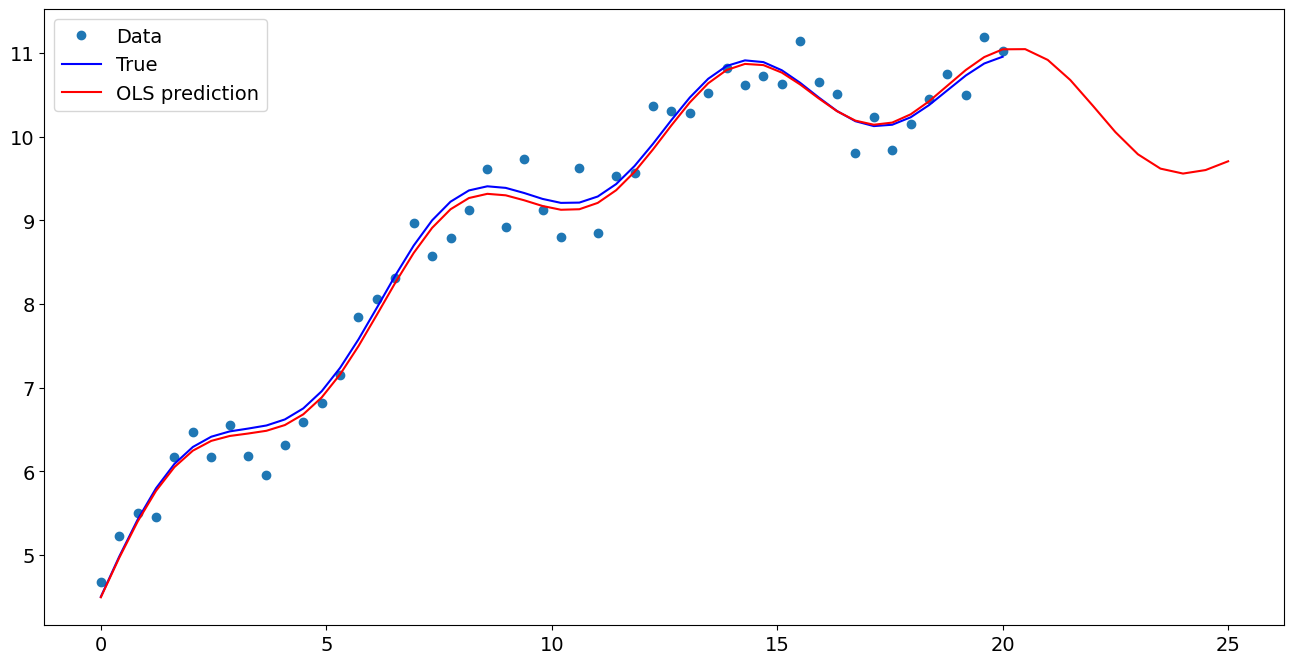

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.962412
x1                  0.492154
np.sin(x1)          0.498196
I((x1 - 5) ** 2)   -0.018735
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.047076
1    10.918277
2    10.678058
3    10.370944
4    10.055541
5     9.790195
6     9.618699
7     9.559578
8     9.601548
9     9.706282
dtype: float64